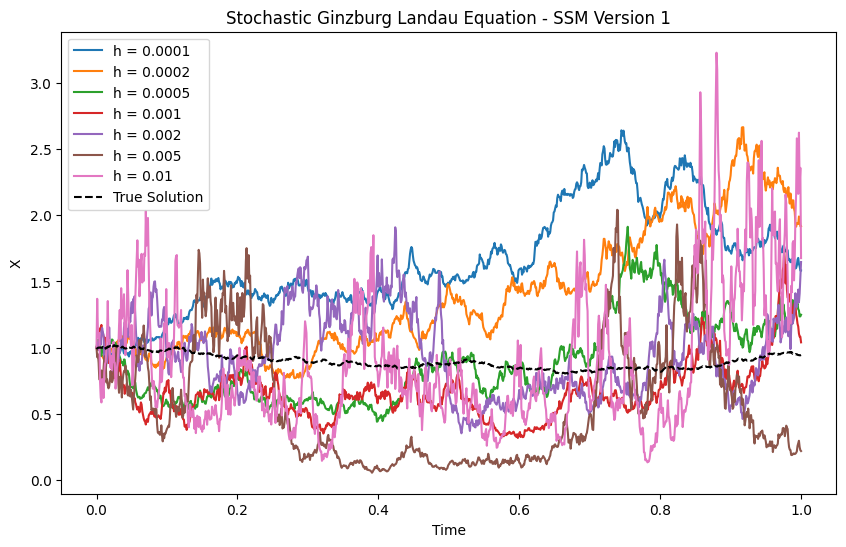

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
sigma = 1.5
c = 0.5
x0 = 1.0
T = 1.0
N = 1000
M = 1000

# Define the SSM version 1 functions
def v1(t, x, mu):
    return -x**3

def b1(t, x, mu):
    return (sigma**2 / 2) * x + c * np.mean(mu)

def sigma1(t, x, mu):
    return sigma * x

# Define the SSM version 2 functions
def v2(t, x, mu):
    return -x**3 + c * np.mean(mu)

def b2(t, x, mu):
    return (sigma**2 / 2) * x

def sigma2(t, x, mu):
    return sigma * x

# Define the split-step method
def split_step_method(version, h):
    times = np.linspace(0, T, M+1)
    X = np.zeros((N, M+1))
    X[:, 0] = x0

    for n in range(M):
        mu_X = np.mean(X[:, n])
        mu_Y = np.mean(X[:, n])

        Y = X[:, n] + h * v1(times[n], X[:, n], mu_X)
        X[:, n+1] = Y + h * b1(times[n], Y, mu_Y) + sigma1(times[n], Y, mu_Y) * np.sqrt(h) * np.random.normal(size=N)

    return times, X

# Choose a timestep
h_values = [1e-4, 2e-4, 5e-4, 1e-3, 2e-3, 5e-3, 1e-2]
true_solution_time, true_solution = split_step_method(1, 1e-5)  # For calculating the true solution

# Plot the results
plt.figure(figsize=(10, 6))
for h in h_values:
    times, solution = split_step_method(1, h)
    plt.plot(times, solution[0, :], label=f'h = {h}')

plt.plot(true_solution_time, true_solution[0, :], label='True Solution', linestyle='--', color='black')
plt.title('Stochastic Ginzburg Landau Equation - SSM Version 1')
plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.show()

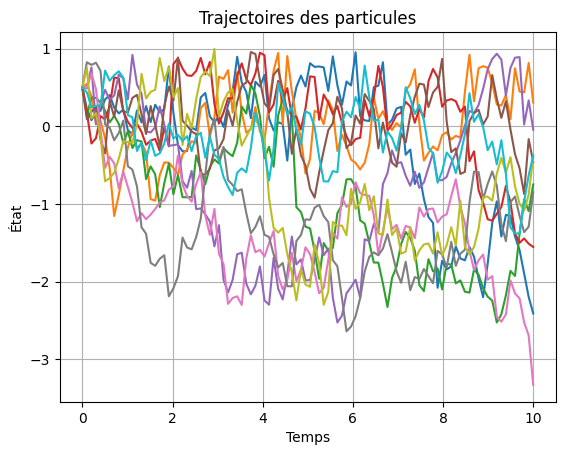

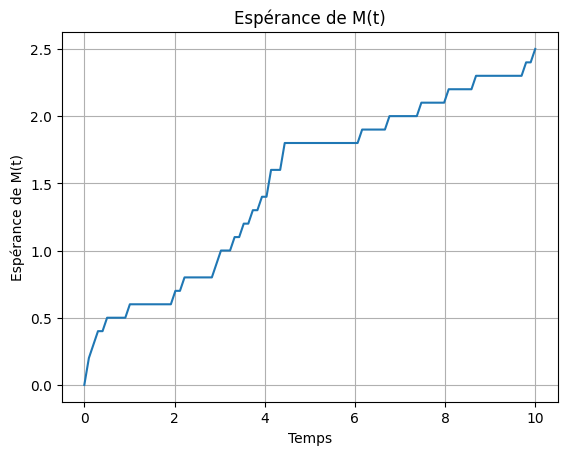

In [ ]:
# Paramètres du système
N = 10  # Nombre de particules
T = 10 # Temps total de simulation
alpha = 0.01  # Coefficient alpha
nb_points = 100  # Discrétisation en temps
dt = T / (nb_points - 1)

# Initialisation des matrices
M = np.zeros((N, nb_points))  # Matrice des Mjt qui comptent les nombres de spikes
X = np.zeros((N, nb_points))  # Matrice des états des particules
X[:, 0] = np.zeros(N) + 0.5

# Simulation
for t in range(1, nb_points):
    for i in range(N):
        # Mise à jour des états des particules avec le mouvement brownien
        X[i, t] = X[i, t - 1] + 0.9*np.sqrt(dt) * np.random.randn()

        # Calcul du nombre de spikes
        if X[i, t] > 1:
            M[i, t] = M[i, t - 1] + 1
        else:
            M[i, t] = M[i, t - 1]

        # Calcul de l'espérance de M(t) à chaque instant
        e_t = np.mean(M[:, t])

        # Mise à jour des états des particules avec le terme dépendant de l'espérance de M(t)
        X[i, t] += alpha / N * np.mean(X[:, t]) - M[i, t] - (alpha / N * np.mean(X[:, t - 1]) - M[i, t - 1])

# Plot des trajectoires des particules
plt.figure()
for i in range(N):
    plt.plot(np.linspace(0, T, nb_points), X[i, :])
plt.xlabel('Temps')
plt.ylabel('État')
plt.title('Trajectoires des particules')
plt.grid(True)
plt.show()

# Plot de l'espérance de M(t)
plt.figure()
plt.plot(np.linspace(0, T, nb_points), np.mean(M, axis=0))
plt.xlabel('Temps')
plt.ylabel('Espérance de M(t)')
plt.title('Espérance de M(t)')
plt.grid(True)
plt.show()

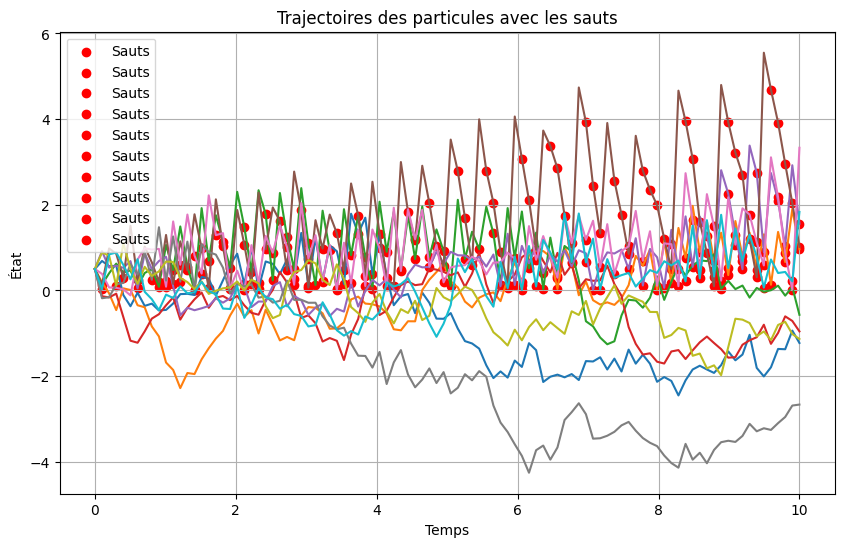

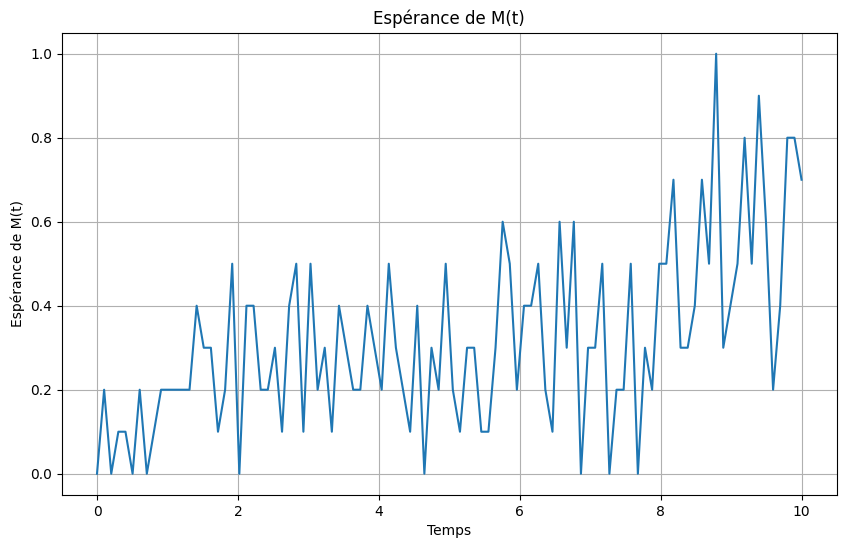

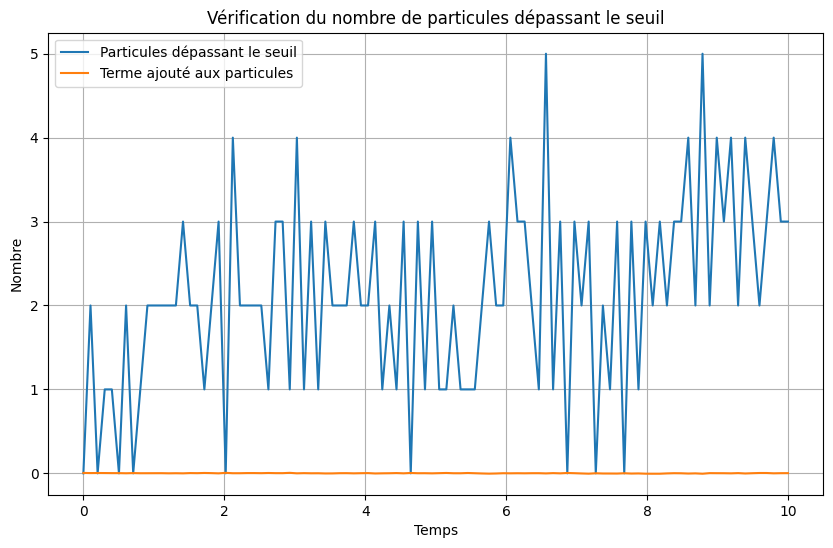

In [ ]:
# Paramètres du système
N = 10  # Nombre de particules
T = 10  # Temps total de simulation
alpha = 0.01  # Coefficient alpha
nb_points = 100  # Discrétisation en temps
dt = T / (nb_points - 1)

# Initialisation des matrices
M = np.zeros((N, nb_points))  # Matrice des Mjt qui comptent les nombres de spikes
X = np.zeros((N, nb_points))  # Matrice des états des particules
X[:, 0] = np.zeros(N) + 0.5

# Nombre de particules qui dépassent le seuil à chaque étape
particles_exceed_threshold = np.zeros(nb_points)

# Simulation
for t in range(1, nb_points):
    for i in range(N):
        # Mise à jour des états des particules avec le mouvement brownien
        X[i, t] = X[i, t - 1] + np.sqrt(dt) * np.random.randn()

        # Calcul du nombre de spikes
        if X[i, t] > 1:
            M[i, t] = M[i, t - 1] + 1
            particles_exceed_threshold[t] += 1

        # Calcul de l'espérance de M(t) à chaque instant
        e_t = np.mean(M[:, t])

        # Mise à jour des états des particules avec le terme dépendant de l'espérance de M(t)
        X[i, t] += alpha / N * np.mean(X[:, t]) - M[i, t] - (alpha / N * np.mean(X[:, t - 1]) - M[i, t - 1])

# Plot des trajectoires des particules avec les sauts
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(np.linspace(0, T, nb_points), X[i, :])
    jump_indices = np.where(np.diff(M[i, :]) > 0)[0] + 1
    jump_times = jump_indices * dt
    jump_values = X[i, jump_indices]
    plt.scatter(jump_times, jump_values, color='red', marker='o', label='Sauts')  # Visualisation des sauts
plt.xlabel('Temps')
plt.ylabel('État')
plt.title('Trajectoires des particules avec les sauts')
plt.legend()
plt.grid(True)
plt.show()

# Plot de l'espérance de M(t)
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, nb_points), np.mean(M, axis=0))
plt.xlabel('Temps')
plt.ylabel('Espérance de M(t)')
plt.title('Espérance de M(t)')
plt.grid(True)
plt.show()

# Vérification du nombre de particules dépassant le seuil par rapport au terme ajouté aux particules
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, T, nb_points), particles_exceed_threshold, label='Particules dépassant le seuil')
plt.plot(np.linspace(0, T, nb_points), alpha * np.mean(X, axis=0), label='Terme ajouté aux particules')
plt.xlabel('Temps')
plt.ylabel('Nombre')
plt.title('Vérification du nombre de particules dépassant le seuil')
plt.legend()
plt.grid(True)
plt.show()

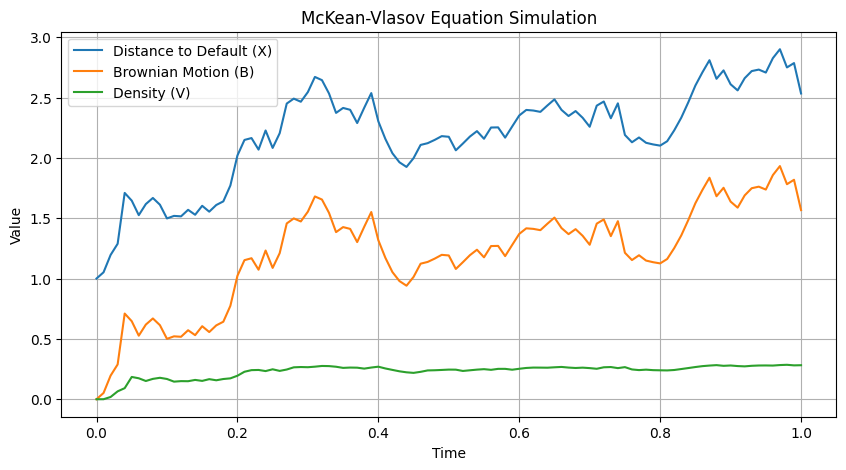

In [ ]:
# Parameters
alpha = 0.1  # Strength of the feedback
T = 1.0      # Total time
dt = 0.01    # Time step
N = int(T / dt) + 1  # Number of time steps

# Initial condition
X0 = 1.0  # Initial distance to default
B0 = 0.0  # Initial value of Brownian motion

# Arrays to store results
X = np.zeros(N)
B = np.zeros(N)
V = np.zeros(N)

# Simulation
X[0] = X0
B[0] = B0
for i in range(1, N):
    dW = np.random.normal(0, np.sqrt(dt))  # Brownian increment
    X[i] = X[i-1] + dW - alpha * (X[i-1] - np.sum(X[:i]) / i) * dt  # McKean-Vlasov equation for X
    B[i] = B[i-1] + dW  # Brownian motion
    V[i] = -alpha * np.trapz(V[:i], x=X[:i]) + np.trapz(np.exp(-X[:i]), x=X[:i])  # McKean-Vlasov equation for V

# Visualization
t = np.linspace(0.0, T, N)
plt.figure(figsize=(10, 5))
plt.plot(t, X, label='Distance to Default (X)')
plt.plot(t, B, label='Brownian Motion (B)')
plt.plot(t, V, label='Density (V)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('McKean-Vlasov Equation Simulation')
plt.legend()
plt.grid(True)
plt.show()

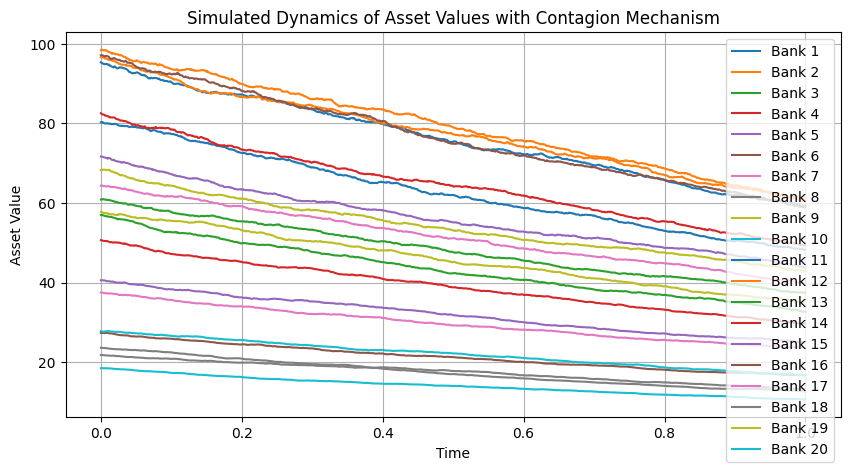

In [ ]:
# Parameters
N = 20  # Number of banks
T = 1.0 # Total time
dt = 0.001  # Time step
alpha = 0.01  # Contagion parameter

# Initial conditions
A0 = np.random.uniform(5, 100, size=N)  # Initial assets
D0 = np.random.uniform(0.1, 1, size=N)  # Initial default barriers

# Impact kernel (triangular)
def impact_kernel(t):
    return max(0, 1 - t)

# Initialize arrays to store results
t_values = np.arange(0, T + dt, dt)
A_values = np.zeros((N, len(t_values)))
D_values = np.zeros((N, len(t_values)))

# Simulation
A_values[:, 0] = A0
D_values[:, 0] = D0

for i in range(1, len(t_values)):
    dW = np.random.normal(0, np.sqrt(dt), size=N)  # Brownian increments
    L = np.zeros(N)  # Initialize contagion process
    for j in range(N):
        L[j] = np.trapz(impact_kernel(np.arange(0, t_values[i])), dx=dt)  # Calculate contagion process

    # Update asset values with contagion mechanism
    for j in range(N):
        A_values[j, i] = A_values[j, i - 1] * np.exp((alpha * L[j] - 0.5) * dt + np.sqrt(dt) * dW[j])

# Plotting
plt.figure(figsize=(10, 5))
for j in range(N):
    plt.plot(t_values, A_values[j], label=f'Bank {j+1}')

plt.xlabel('Time')
plt.ylabel('Asset Value')
plt.title('Simulated Dynamics of Asset Values with Contagion Mechanism')
plt.legend()
plt.grid(True)
plt.show()

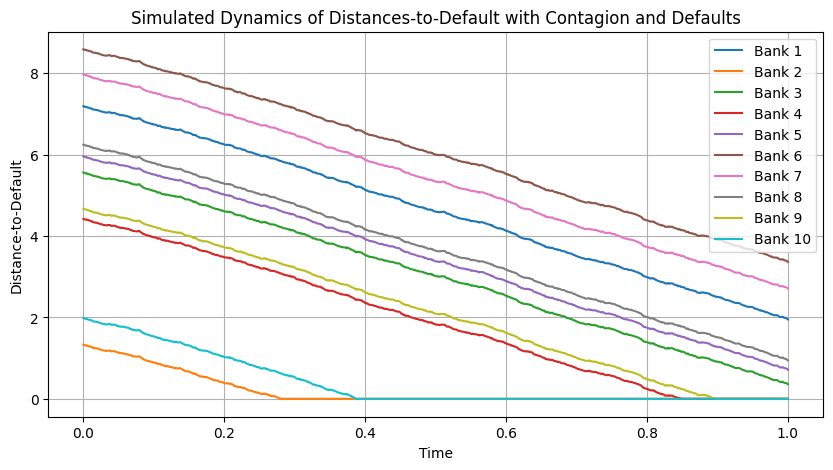

In [ ]:
# Parameters
N = 10  # Number of banks
T = 1.0  # Total time
dt = 0.001  # Time step
alpha = 100  # Contagion parameter
mu = -5  # Drift
sigma = 0.2  # Volatility
rho = 0.99  # Correlation coefficient
default_barrier = 0  # Default barrier

# Initial conditions
Y0 = np.random.uniform(1, 10, size=N)  # Initial distances-to-default

# Impact kernel (triangular)
def impact_kernel(t):
    return np.maximum(0, 1 - t)

# Initialize arrays to store results
t_values = np.arange(0, T + dt, dt)
Y_values = np.zeros((N, len(t_values)))
defaulted = np.zeros(N, dtype=bool)

# Simulation
Y_values[:, 0] = Y0

for i in range(1, len(t_values)):
    dW = np.random.normal(0, np.sqrt(dt), size=N)  # Brownian increments
    dW0 = np.random.normal(0, np.sqrt(dt))  # Additional Brownian increment for correlation
    dW_tilde = rho * dW0 + np.sqrt(1 - rho**2) * dW  # Correlated Brownian increments

    # Calculate contagion process
    L = np.zeros(N)
    for j in range(N):
        L[j] = np.trapz(impact_kernel(np.arange(0, t_values[i])), dx=dt)  # Calculate contagion process

    # Update distances-to-default with contagion mechanism
    for j in range(N):
        if not defaulted[j]:
            dX = mu * dt + sigma * dW_tilde[j] - alpha * L[j] * dt
            Y_values[j, i] = Y_values[j, i - 1] + dX
            if Y_values[j, i] <= default_barrier:
                defaulted[j] = True
                # Apply contagion to other banks
                for k in range(N):
                    if k != j:
                        Y_values[k, i] -= alpha * L[j] * dt

# Plotting
plt.figure(figsize=(10, 5))
for j in range(N):
    plt.plot(t_values, Y_values[j], label=f'Bank {j+1}')

plt.xlabel('Time')
plt.ylabel('Distance-to-Default')
plt.title('Simulated Dynamics of Distances-to-Default with Contagion and Defaults')
plt.legend()
plt.grid(True)
plt.show()

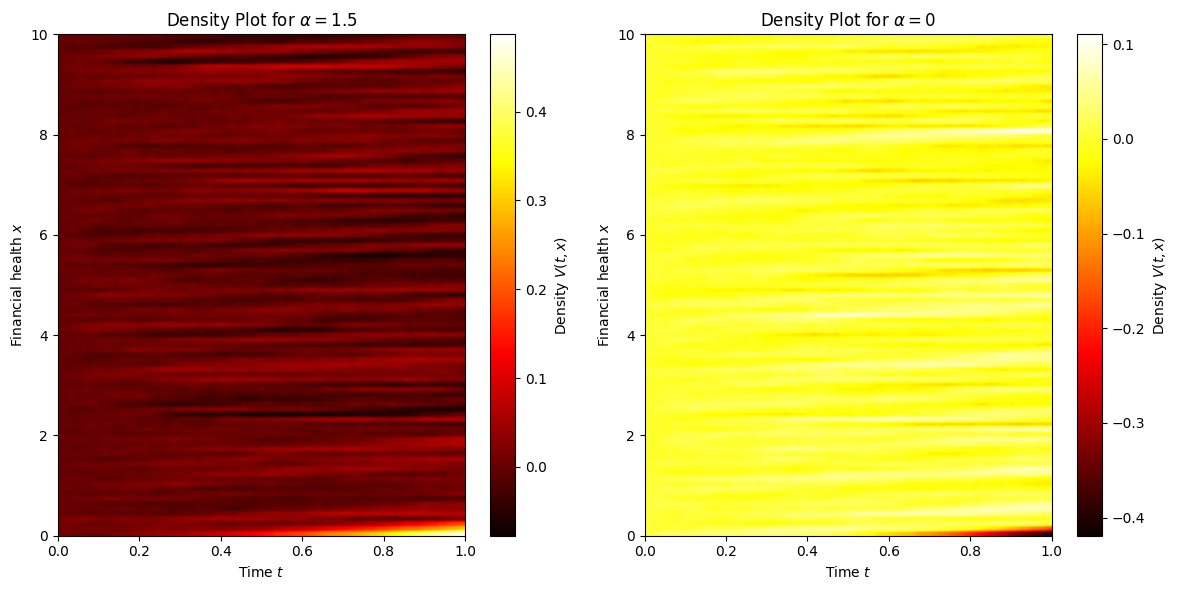

In [ ]:
# Parameters
alpha_values = [1.5, 0]
rho = 0.1
sigma = 1
b = 0
height = 2 / 0.015
K_width = 0.015

# Impact kernel (isosceles triangle)
def impact_kernel(t):
    return np.maximum(0, 1 - np.abs(t) / K_width) * height

# Function to compute density V(t, x)
def compute_density(alpha):
    dt = 0.001
    T = 1
    dx = 0.1
    X_max = 10

    # Initialize arrays to store results
    t_values = np.arange(0, T + dt, dt)
    x_values = np.arange(0, X_max + dx, dx)
    V_values = np.zeros((len(t_values), len(x_values)))

    # Initial condition
    V_values[0] = 0.01 * np.exp(-x_values)

    # Numerical simulation
    for i in range(1, len(t_values)):
        dW = np.random.normal(0, np.sqrt(dt), size=len(x_values))
        dL = np.trapz(impact_kernel(np.arange(0, t_values[i])), dx=dt)
        V_values[i] = V_values[i-1] - 0.5 * sigma**2 * dt * np.gradient(V_values[i-1], dx) \
            + sigma * np.sqrt(dt) * dW - alpha * dL

    return t_values, x_values, V_values

# Plotting
plt.figure(figsize=(12, 6))

for i, alpha in enumerate(alpha_values, start=1):
    t_values, x_values, V_values = compute_density(alpha)
    plt.subplot(1, 2, i)
    plt.imshow(V_values.T, aspect='auto', extent=[0, 1, 0, 10], origin='lower', cmap='hot')
    plt.colorbar(label='Density $V(t, x)$')
    plt.xlabel('Time $t$')
    plt.ylabel('Financial health $x$')
    plt.title(f'Density Plot for $\\alpha = {alpha}$')

plt.tight_layout()
plt.show()

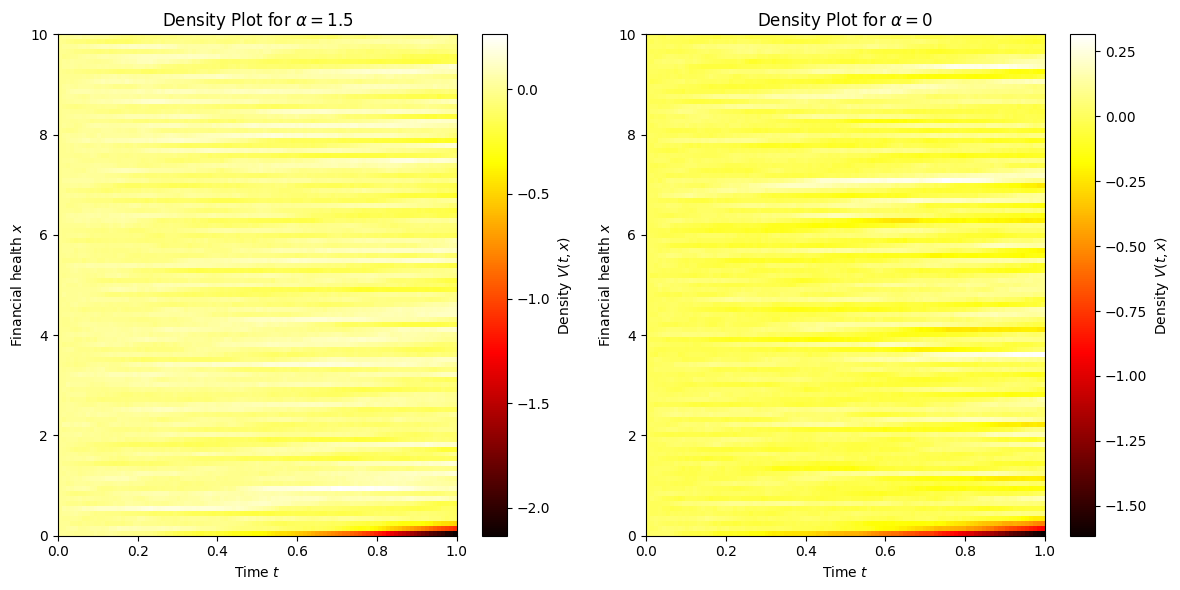

In [ ]:
# Parameters
alpha_values = [1.5, 0]  # Values of alpha
rho = 0.1
sigma = 1
b = 0
height = 2 / 0.015
K_width = 0.015
default_barrier = 0

# Impact kernel (isosceles triangle)
def impact_kernel(t):
    return np.maximum(0, 1 - np.abs(t) / K_width) * height

# Function to simulate the dynamics of density V(t, x)
def simulate_density(alpha):
    dt = 0.01
    T = 1
    dx = 0.1
    X_max = 10

    # Initialize arrays to store results
    t_values = np.arange(0, T + dt, dt)
    x_values = np.arange(0, X_max + dx, dx)
    V_values = np.zeros((len(t_values), len(x_values)))

    # Initial condition
    V_values[0] = 0.01 * np.exp(-x_values)

    # Numerical simulation
    for i in range(1, len(t_values)):
        dW = np.random.normal(0, np.sqrt(dt), size=len(x_values))
        dL = np.trapz(impact_kernel(np.arange(0, t_values[i])), dx=dt)

        # Update density with contagion mechanism
        V_values[i] = V_values[i - 1] - 0.5 * sigma**2 * dt * np.gradient(V_values[i - 1], dx) \
                      + sigma * np.sqrt(dt) * dW - alpha * dL

        # Apply contagion from default
        default_indices = np.where(V_values[i] <= default_barrier)[0]
        for idx in default_indices:
            if idx > 0:
                V_values[i, :idx] -= alpha * dL

    return t_values, x_values, V_values

# Plotting
plt.figure(figsize=(12, 6))

for i, alpha in enumerate(alpha_values, start=1):
    t_values, x_values, V_values = simulate_density(alpha)
    plt.subplot(1, 2, i)
    plt.imshow(V_values.T, aspect='auto', extent=[0, 1, 0, 10], origin='lower', cmap='hot')
    plt.colorbar(label='Density $V(t, x)$')
    plt.xlabel('Time $t$')
    plt.ylabel('Financial health $x$')
    plt.title(f'Density Plot for $\\alpha = {alpha}$')

plt.tight_layout()
plt.show()